In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr
import matplotlib.dates as mdates
from datetime import datetime, timedelta

sys.path.append('../utils/')

from utils import *
from analysis_utils import *

plt.rcParams['font.family'] = 'Helvetica'

In [28]:
def plot_fig_subplots_weeks(merged, title=None, month_interval=3, col_map=None, date_col='ds',alpha=0.5):
    """
    # Generate synthetic time series data
    dates = pd.date_range('20210101', periods=100)
    data1 = np.random.randn(100).cumsum()
    data2 = np.random.randn(100).cumsum()
    data3 = np.random.randn(100).cumsum()
    """
    time_name = 'T'
    merged[time_name] = pd.to_datetime(merged[date_col], infer_datetime_format=True, errors='coerce')
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(4, 3, figsize=(10, 10), sharex=False, sharey=False)
    
    #fig.delaxes(axs[4,1])
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()
    
    # Plot 1: plant based
    axs[0].plot(merged[time_name], merged['plant_based_plus_plant_based'], label="`Plant based'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Search volume')
    axs[0].set_title("Searches: `Plant based'")
    axs[0].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylim([0, merged['plant_based_plus_plant_based'].max()])
    
    # Plot 2: vegan
    axs[1].plot(merged[time_name], merged['vegan'], label="`Vegan'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[1].set_ylabel('Search volume')
    axs[1].set_title("Searches: `Vegan'")
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylim([0, merged['vegan'].max()])
    
    # Plot 3: vegetarian
    axs[2].plot(merged[time_name], merged['vegetarian'], label="`Vegetarian'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[2].set_ylabel('Search volume')
    axs[2].set_title("Searches: `Vegetarian'")
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].set_ylim([0, merged['vegetarian'].max()])

    
    # Plot 6: milk
    axs[3].plot(merged[time_name], merged['StewartMilk'], label="Milk", color='black', alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[3].set_ylabel('Gallons per household')
    axs[3].set_title("Milk (Stewart et al.)")
    #axs[6].set_yscale('log')
    axs[3].tick_params(axis='x', rotation=45)
    axs[3].tick_params(axis='y')
    axs[3].set_ylim([0, merged['StewartMilk'].max()])

    
    # PB milk
    axs[4].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based milk", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[4].set_ylabel('Gallons per household')
    axs[4].set_title("Plant-based milk (Stewart et al.)")
    #axs[6].set_yscale('log')
    axs[4].tick_params(axis='x', rotation=45)
    axs[4].tick_params(axis='y')
    axs[4].set_ylim([0, merged['StewartPBMilk'].max()])
   

    # PB meat
    zhao_scaled_y = 100*merged['Zhao']
    axs[5].plot(merged[time_name], zhao_scaled_y, label="Plant based meat", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[5].set_ylabel('Market share')
    axs[5].set_title("Plant-based meat (Zhao et al.)")
    #axs[6].set_yscale('log')
    axs[5].tick_params(axis='x', rotation=45)
    axs[5].tick_params(axis='y')
    axs[5].set_ylim([0, zhao_scaled_y.max()])
    
    """
    # PB meat
    axs[6].plot(merged[time_name], merged['NeuhoferLusk'], label="Plant based meat", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[6].set_ylabel('Market share')
    axs[6].set_title("Plant-based meat (Neuhofer and Lusk)")
    #axs[6].set_yscale('log')
    axs[6].tick_params(axis='x', rotation=45)
    axs[6].tick_params(axis='y')
    axs[6].set_ylim([0, merged['NeuhoferLusk'].max()])
    """
    
    # Plot 1: plant based
    axs[6].plot(merged[time_name], merged['plant_based_informative'], label="`Plant based (Informative)'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[6].set_ylabel('Search volume')
    axs[6].set_title("Searches: `Plant based', Informative")
    axs[6].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[6].set_ylim([0, merged['plant_based_informative'].max()])
    
    # Plot 2: vegan
    axs[7].plot(merged[time_name], merged['vegan_informative'], label="`Vegan (Informative)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[7].set_ylabel('Search volume')
    axs[7].set_title("Searches: `Vegan', Informative")
    axs[7].tick_params(axis='x', rotation=45)
    axs[7].set_ylim([0, merged['vegan_informative'].max()])
    
    # Plot 3: vegetarian
    axs[8].plot(merged[time_name], merged['vegetarian_informative'], label="`Vegetarian (Informative)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[8].set_ylabel('Search volume')
    axs[8].set_title("Searches: `Vegetarian', Informative")
    axs[8].tick_params(axis='x', rotation=45)
    axs[8].set_ylim([0, merged['vegetarian_informative'].max()])
    
    # Plot 1: plant based
    axs[9].plot(merged[time_name], merged['plant_based_behavior'], label="`Plant based (Behavior)'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[9].set_ylabel('Search volume')
    axs[9].set_title("Searches: `Plant based', Behavior")
    axs[9].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[9].set_ylim([0, merged['plant_based_behavior'].max()])
    
    # Plot 2: vegan
    axs[10].plot(merged[time_name], merged['vegan_behavior'], label="`Vegan (Behavior)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[10].set_ylabel('Search volume')
    axs[10].set_title("Searches: `Vegan', Behavior")
    axs[10].tick_params(axis='x', rotation=45)
    axs[10].set_ylim([0, merged['vegan_behavior'].max()])
    
    # Plot 3: vegetarian
    axs[11].plot(merged[time_name], merged['vegetarian_behavior'], label="`Vegetarian (Behavior)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[11].set_ylabel('Search volume')
    axs[11].set_title("Searches: `Vegetarian', Behavior")
    axs[11].tick_params(axis='x', rotation=45)
    axs[11].set_ylim([0, merged['vegetarian_behavior'].max()])
    
    # Plotting the documentaries
    twinaxs = []
    for ax in axs:
        twinax = ax.twinx()
        twinax.plot(merged[time_name], merged['fok'], label='Forks Over Knives',alpha=alpha)
        twinax.plot(merged[time_name], merged['cowspiracy'], label='Cowspiracy',alpha=alpha)
        twinax.plot(merged[time_name], merged['wth'], label='What the Health',alpha=alpha)
        twinax.plot(merged[time_name], merged['okja'], label='Okja',alpha=alpha)
        twinax.plot(merged[time_name], merged['tgc'], label='The Game Changers',alpha=alpha)
        twinax.plot(merged[time_name], merged['yawye'], label='You Are What You Eat',alpha=alpha)

        twinax.set_xlabel('Date')
        #twinax.set_ylabel('Search volume: Topics')
        #ax.set_title('Title')
        #twinax.tick_params(axis='x', rotation=45)
        twinax.tick_params(axis='y')
        
        twinaxs.append(twinax)

    # Place a legend below the subplots
    handles = []
    labels = []
    
    for ax in axs:
        this_handles, this_labels = ax.get_legend_handles_labels()
        handles += this_handles
        labels += this_labels
        
    for ax in twinaxs:
        this_handles, this_labels = ax.get_legend_handles_labels()
        handles += this_handles
        labels += this_labels        
        
    to_put_in_legend = ['Forks Over Knives', 'Cowspiracy', 'What the Health', 'Okja', 'The Game Changers',
                       'You Are What You Eat']
                        #, "`Plant based'", "`Vegan'",  "`Vegetarian'", 'Beef demand', 'Chicken demand', 'Pork demand']
        
    indices = []
    for lab in to_put_in_legend:
        indices.append(labels.index(lab))
        
    handles_to_plot = [handles[i] for i in indices]
    labels_to_plot = [labels[i] for i in indices]
        
    fig.legend(handles_to_plot, labels_to_plot, loc='lower center', ncol=3, borderaxespad=0.1)

    #print(handles)
    #print(labels)
    
    # Adjust layout to make room for the legend
    fig.tight_layout(rect=[0, 0.03, 1, 0.95]) #
    #plt.subplots_adjust(hspace=0.5, bottom=0.2)

    plt.show()


In [29]:
def plot_fig_subplots_months(merged, title=None, month_interval=3, col_map=None, date_col='ds',alpha=0.5):
    """
    # Generate synthetic time series data
    dates = pd.date_range('20210101', periods=100)
    data1 = np.random.randn(100).cumsum()
    data2 = np.random.randn(100).cumsum()
    data3 = np.random.randn(100).cumsum()
    """
    time_name = 'T'
    merged[time_name] = pd.to_datetime(merged[date_col], infer_datetime_format=True, errors='coerce')
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(5, 3, figsize=(10, 12), sharex=False, sharey=False)
    
    #fig.delaxes(axs[4,1])
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()
    
    # Plot 1: plant based
    axs[0].plot(merged[time_name], merged['plant_based_plus_plant_based'], label="`Plant based'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Search volume')
    axs[0].set_title("Searches: `Plant based'")
    axs[0].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylim([0, merged['plant_based_plus_plant_based'].max()])
    
    # Plot 2: vegan
    axs[1].plot(merged[time_name], merged['vegan'], label="`Vegan'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[1].set_ylabel('Search volume')
    axs[1].set_title("Searches: `Vegan'")
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylim([0, merged['vegan'].max()])
    
    # Plot 3: vegetarian
    axs[2].plot(merged[time_name], merged['vegetarian'], label="`Vegetarian'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[2].set_ylabel('Search volume')
    axs[2].set_title("Searches: `Vegetarian'")
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].set_ylim([0, merged['vegetarian'].max()])

    
    # Plot 6: milk
    axs[3].plot(merged[time_name], merged['StewartMilk'], label="Milk", color='black', alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[3].set_ylabel('Gallons per household')
    axs[3].set_title("Milk (Stewart et al.)")
    #axs[6].set_yscale('log')
    axs[3].tick_params(axis='x', rotation=45)
    axs[3].tick_params(axis='y')
    axs[3].set_ylim([0, merged['StewartMilk'].max()])

    
    # PB milk
    axs[4].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based milk", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[4].set_ylabel('Gallons per household')
    axs[4].set_title("Plant-based milk (Stewart et al.)")
    #axs[6].set_yscale('log')
    axs[4].tick_params(axis='x', rotation=45)
    axs[4].tick_params(axis='y')
    axs[4].set_ylim([0, merged['StewartPBMilk'].max()])
   

    # PB meat
    zhao_scaled_y = 100*merged['Zhao']
    axs[5].plot(merged[time_name], zhao_scaled_y, label="Plant based meat", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[5].set_ylabel('Market share')
    axs[5].set_title("Plant-based meat (Zhao et al.)")
    #axs[6].set_yscale('log')
    axs[5].tick_params(axis='x', rotation=45)
    axs[5].tick_params(axis='y')
    axs[5].set_ylim([0, zhao_scaled_y.max()])
    
    """
    # PB meat
    axs[6].plot(merged[time_name], merged['NeuhoferLusk'], label="Plant based meat", color='black',alpha=alpha)
    #axs[6].plot(merged[time_name], merged['StewartPBMilk'], label="Plant based Milk", color='grey')
    #axs[0].set_xlabel('Date')
    axs[6].set_ylabel('Market share')
    axs[6].set_title("Plant-based meat (Neuhofer and Lusk)")
    #axs[6].set_yscale('log')
    axs[6].tick_params(axis='x', rotation=45)
    axs[6].tick_params(axis='y')
    axs[6].set_ylim([0, merged['NeuhoferLusk'].max()])
    """
    
    # Plot 4: beef
    axs[6].plot(merged[time_name], merged['ksu_beef'], label="Beef demand", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[6].set_ylabel('Demand')
    axs[6].set_title("Beef (Bekkerman et al.)")
    axs[6].tick_params(axis='x', rotation=45)
    axs[6].set_ylim([0, merged['ksu_beef'].max()])
    
    # Plot 5: chicken
    axs[7].plot(merged[time_name], merged['ksu_chicken'], label="Chicken demand", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[7].set_ylabel('Demand')
    axs[7].set_title("Chicken (Bekkerman et al.)")
    axs[7].tick_params(axis='x', rotation=45)
    axs[7].set_ylim([0, merged['ksu_chicken'].max()])

    
    # Plot 6: pork
    axs[8].plot(merged[time_name], merged['ksu_pork'], label="Pork demand", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[8].set_ylabel('Demand')
    axs[8].set_title("Pork (Bekkerman et al.)")
    axs[8].tick_params(axis='x', rotation=45)
    axs[8].set_ylim([0, merged['ksu_pork'].max()])
    
    # Plot 1: plant based
    axs[9].plot(merged[time_name], merged['plant_based_informative'], label="`Plant based (Informative)'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[9].set_ylabel('Search volume')
    axs[9].set_title("Searches: `Plant based', Informative")
    axs[9].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[9].set_ylim([0, merged['plant_based_informative'].max()])
    
    # Plot 2: vegan
    axs[10].plot(merged[time_name], merged['vegan_informative'], label="`Vegan (Informative)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[10].set_ylabel('Search volume')
    axs[10].set_title("Searches: `Vegan', Informative")
    axs[10].tick_params(axis='x', rotation=45)
    axs[10].set_ylim([0, merged['vegan_informative'].max()])
    
    # Plot 3: vegetarian
    axs[11].plot(merged[time_name], merged['vegetarian_informative'], label="`Vegetarian (Informative)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[11].set_ylabel('Search volume')
    axs[11].set_title("Searches: `Vegetarian', Informative")
    axs[11].tick_params(axis='x', rotation=45)
    axs[11].set_ylim([0, merged['vegetarian_informative'].max()])
    
    # Plot 1: plant based
    axs[12].plot(merged[time_name], merged['plant_based_behavior'], label="`Plant based (Behavior)'", color='black',
               alpha=0.5)
    #axs[0].set_xlabel('Date')
    axs[12].set_ylabel('Search volume')
    axs[12].set_title("Searches: `Plant based', Behavior")
    axs[12].tick_params(axis='x', rotation=45)
    #axs[0].tick_params(axis='x', rotation=45)
    axs[12].set_ylim([0, merged['plant_based_behavior'].max()])
    
    # Plot 2: vegan
    axs[13].plot(merged[time_name], merged['vegan_behavior'], label="`Vegan (Behavior)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[13].set_ylabel('Search volume')
    axs[13].set_title("Searches: `Vegan', Behavior")
    axs[13].tick_params(axis='x', rotation=45)
    axs[13].set_ylim([0, merged['vegan_behavior'].max()])
    
    # Plot 3: vegetarian
    axs[14].plot(merged[time_name], merged['vegetarian_behavior'], label="`Vegetarian (Behavior)'", color='black',alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[14].set_ylabel('Search volume')
    axs[14].set_title("Searches: `Vegetarian', Behavior")
    axs[14].tick_params(axis='x', rotation=45)
    axs[14].set_ylim([0, merged['vegetarian_behavior'].max()])
    
    # Plotting the documentaries
    twinaxs = []
    for ax in axs:
        twinax = ax.twinx()
        twinax.plot(merged[time_name], merged['fok'], label='Forks Over Knives',alpha=alpha)
        twinax.plot(merged[time_name], merged['cowspiracy'], label='Cowspiracy',alpha=alpha)
        twinax.plot(merged[time_name], merged['wth'], label='What the Health',alpha=alpha)
        twinax.plot(merged[time_name], merged['okja'], label='Okja',alpha=alpha)
        twinax.plot(merged[time_name], merged['tgc'], label='The Game Changers',alpha=alpha)
        twinax.plot(merged[time_name], merged['yawye'], label='You Are What You Eat',alpha=alpha)

        twinax.set_xlabel('Date')
        #twinax.set_ylabel('Search volume: Topics')
        #ax.set_title('Title')
        #twinax.tick_params(axis='x', rotation=45)
        twinax.tick_params(axis='y')
        
        twinaxs.append(twinax)

    # Place a legend below the subplots
    handles = []
    labels = []
    
    for ax in axs:
        this_handles, this_labels = ax.get_legend_handles_labels()
        handles += this_handles
        labels += this_labels
        
    for ax in twinaxs:
        this_handles, this_labels = ax.get_legend_handles_labels()
        handles += this_handles
        labels += this_labels        
        
    to_put_in_legend = ['Forks Over Knives', 'Cowspiracy', 'What the Health', 'Okja', 'The Game Changers',
                       'You Are What You Eat']
                        #, "`Plant based'", "`Vegan'",  "`Vegetarian'", 'Beef demand', 'Chicken demand', 'Pork demand']
        
    indices = []
    for lab in to_put_in_legend:
        indices.append(labels.index(lab))
        
    handles_to_plot = [handles[i] for i in indices]
    labels_to_plot = [labels[i] for i in indices]
        
    fig.legend(handles_to_plot, labels_to_plot, loc='lower center', ncol=3, borderaxespad=0.1)

    #print(handles)
    #print(labels)
    
    # Adjust layout to make room for the legend
    fig.tight_layout(rect=[0, 0.03, 1, 0.95]) #
    #plt.subplots_adjust(hspace=0.5, bottom=0.2)

    plt.show()


In [34]:
units = 'weeks'
df = pd.read_csv('../data/prepared/merged/merged_' + units + '.csv')

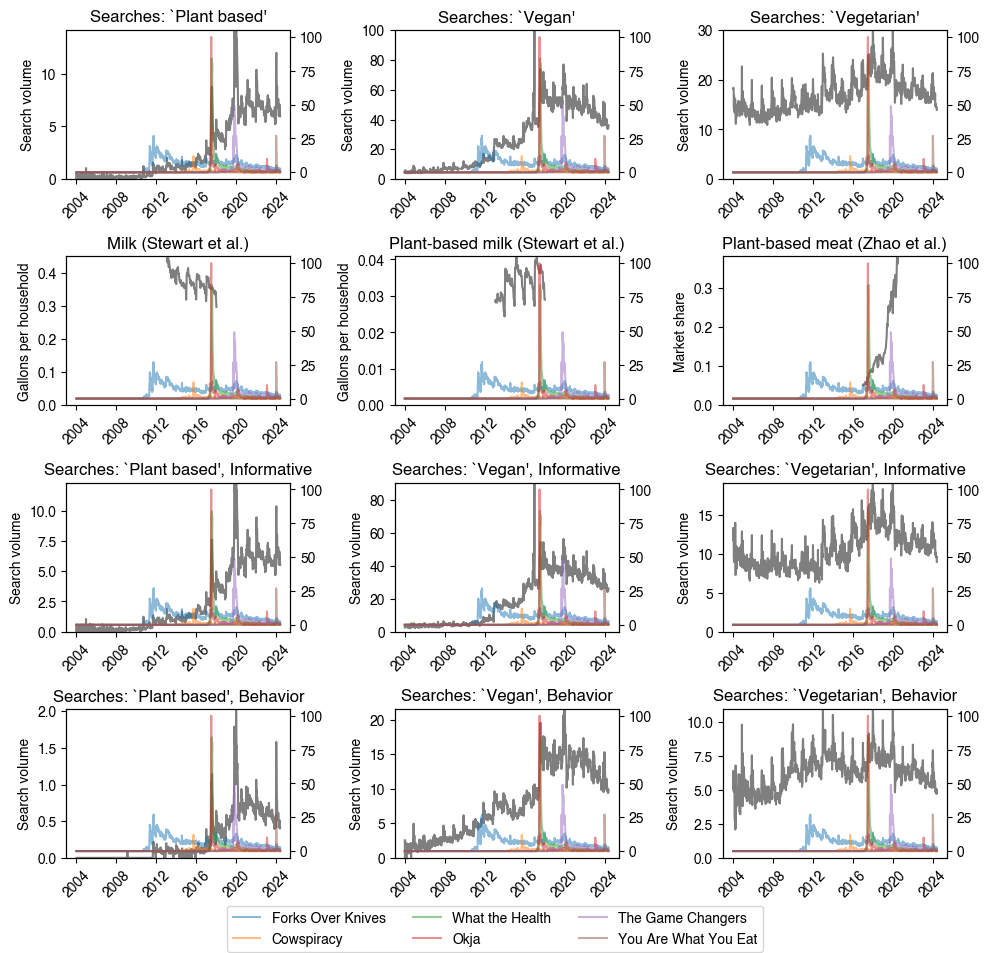

In [37]:
if units == 'weeks':
    plot_fig_subplots_weeks(df)
else:
    plot_fig_subplots_months(df)    